# Web scrapping on Nykaa Website (Foundation Products)
+ We are going to scrape https://www.nykaa.com/makeup/face/face-foundation/c/228
+ We will extract details of each Product like Product name, Brand name, Original price, Discounted price, Discount, Offer, Shades and Reviews.
+ We will convert extracted information into a Dataframe and convert it into a csv/excel file.
+ Also, We will perform EDA.

### Importing Libraries
+ Pandas to create dataframe.
+ Numpy to  work with arrays.
+ Seaborn and matplotlib for data visulization.
+ Requests library to access data from the web pages.
+ Beautiful Soup library for extracting data out of HTML and XML files.
+ Regex library(re) to use regular expressions in the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

In [2]:
#NYKAA FOUNDATION PRODUCTS PAGE URL
url='https://www.nykaa.com/makeup/face/face-foundation/c/228'

In [3]:
#ACCESSING THE DATA FROM THE URL
page=requests.get(url) 

In [4]:
#CHECKING THE STATUS CODE(TO CHECK WHETHER WE HAVE ACCESS TO SCRAPE THE WEBSITE)
#200=SUCCESS CODE
page.status_code

200

In [5]:
#GETTING THE HTML CONTENT FROM THE PAGE
pagecontent=page.text
pagecontent

'<!doctype html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=5.0"/><meta name="theme-color" content="#fff"/><meta name="author" content="NykaaFrontendTeam"/><link rel="icon" href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" type="image/x-icon"/><link rel="canonical" href="https://www.nykaa.com/makeup/face/face-foundation/c/228"/><title data-react-helmet="true">Foundation Cream - Buy Face Foundation Cream at Best Price Online in India | Nykaa</title><meta data-react-helmet="true" name="description" content="Foundation Cream: Buy the best Face Foundation online at low price from Nykaa. Explore the Foundation Makeup collection for the best foundation for oily skin in India with the price under 300. ?Original Products ?COD ?Free Shipping"/><meta data-react-helmet="true" name="keywords" content="Buy face foundation online,  foundation online shopping, buy foundation product online, fac

In [6]:
#SOUP IS USED TO FORMAT AND READ THE HTML CONTENT FROM THE PAGE
soup=BeautifulSoup(pagecontent)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,maximum-scale=5.0" name="viewport"/><meta content="#fff" name="theme-color"/><meta content="NykaaFrontendTeam" name="author"/><link href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" rel="icon" type="image/x-icon"/><link href="https://www.nykaa.com/makeup/face/face-foundation/c/228" rel="canonical"/><title data-react-helmet="true">Foundation Cream - Buy Face Foundation Cream at Best Price Online in India | Nykaa</title><meta content="Foundation Cream: Buy the best Face Foundation online at low price from Nykaa. Explore the Foundation Makeup collection for the best foundation for oily skin in India with the price under 300. ?Original Products ?COD ?Free Shipping" data-react-helmet="true" name="description"/><meta content="Buy face foundation online,  foundation online shopping, buy foundation product online, face foundation online shopping" data-react-

In [7]:
#EXTRACTING INFORMATION SUCH AS ORIGINAL PRICE,DISCOUNTED PRICE AND DISCOUNT OFFERED ON PRODUCTS FROM THE FIRST PAGE.
soup.find_all('div',attrs={'class':"css-1d0jf8e"})

[<div class="css-1d0jf8e"><style data-emotion-css="17x46n5">.css-17x46n5{margin-right:0.25rem;color:rgba(0,19,37,0.64);font-size:14px;font-weight:400;line-height:20px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;}.css-17x46n5 span{-webkit-text-decoration-line:line-through;text-decoration-line:line-through;padding-left:0.25rem;font-size:14px;font-weight:400;line-height:20px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;}</style><span class="css-17x46n5">MRP:<span>₹599</span></span><style data-emotion-css="111z9ua">.css-111z9ua{color:#001325;font-size:14px;font-weight:500;line-height:20px;-webkit-letter-spacing:-0.1px;-moz-letter-spacing:-0.1px;-ms-letter-spacing:-0.1px;letter-spacing:-0.1px;}</style><span class="css-111z9ua">₹479</span><style data-emotion-css="r2b2eh">.css-r2b2eh{color:#008945;margin-left:4px;padding-left:4px;border-left:1px solid #eeeeee;font-size:14px;font-weight:400;line-height:20px;-webki

In [8]:
#CREATING A LIST THAT CONTAINS TOTAL INFORMATION OF ALL PRODUCTS FROM THE FIRST PAGE.
list_1=soup.find_all('div',attrs={'class':"css-1rd7vky"})
list_1

[<div class="css-1rd7vky"><style data-emotion-css="xrzmfa">.css-xrzmfa{font-size:14px;font-weight:500;line-height:20px;-webkit-letter-spacing:-0.1px;-moz-letter-spacing:-0.1px;-ms-letter-spacing:-0.1px;letter-spacing:-0.1px;overflow:hidden;height:42px;margin-bottom:0.75rem;text-align:center;color:#001325;text-overflow:ellipsis;}</style><div class="css-xrzmfa">Nykaa All Day Matte Long Wear Liquid Foundation With Pump</div><style data-emotion-css="1d0jf8e">.css-1d0jf8e{line-height:20px;margin-bottom:0.75rem;display:-webkit-inline-box;display:-webkit-inline-flex;display:-ms-inline-flexbox;display:inline-flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;-webkit-flex-wrap:wrap;-ms-flex-wrap:wrap;flex-wrap:wrap;}</style><div class="css-1d0jf8e"><style data-emotion-css="17x46n5">.css-17x46n5{margin-right:0.25rem;color:rgba(0,19,37,0.64);font-size:1

In [9]:
#EXTRACTING THE ORIGINAL PRICES OF ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_original=[]
for i in list_1:
    original=i.find('span',attrs={'class':"css-17x46n5"})
    list_original.append(original.text)
list_original

['MRP:₹599',
 'MRP:₹629',
 'MRP:',
 'MRP:₹1300',
 'MRP:₹1200',
 'MRP:₹949',
 'MRP:',
 'MRP:₹649',
 'MRP:',
 'MRP:₹325',
 'MRP:',
 'MRP:',
 'MRP:₹799',
 'MRP:₹850',
 'MRP:₹600',
 'MRP:',
 'MRP:',
 'MRP:₹475',
 'MRP:₹599',
 'MRP:₹999']

In [10]:
#EXTRACTING THE DISCOUNTED PRICE OF ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_price=[]
for i in list_1:
    price=i.find('span',attrs={'class':"css-111z9ua"})
    list_price.append(price.text)
list_price

['₹479',
 '₹440',
 '₹2150',
 '₹1105',
 '₹960',
 '₹835',
 '₹2380',
 '₹487',
 '₹2950',
 '₹277',
 '₹1900',
 '₹2900',
 '₹679',
 '₹808',
 '₹510',
 '₹895',
 '₹3300',
 '₹404',
 '₹569',
 '₹899']

In [11]:
#EXTRACTING THE PRODUCT NAMES OF ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_name=[]
for i in list_1:
    name=i.find('div',attrs={'class':"css-xrzmfa"})
    list_name.append(name.text)
list_name

['Nykaa All Day Matte Long Wear Liquid Foundation With Pump',
 'Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...',
 'Estee Lauder Double Wear Stay-In-Place Makeup Mini SPF 10 (F...',
 "NYX Professional Makeup Can't Stop Won't Stop Full Coverage ...",
 'Kay Beauty Hydrating Foundation',
 'Daily Life Forever52 Ultra Definition Liquid Foundation',
 'PIXI H2O Skintint',
 "SERY Fix 'N' Click Foundation Stick",
 'M.A.C Studio Fix Powder Plus Foundation',
 'Maybelline New York Fit Me Matte+Poreless Liquid Foundation ...',
 'M.A.C Studio Fix Fluid SPF 15 Mini',
 'M.A.C Studio Fix Fluid SPF 15',
 'Maybelline New York Super Stay Full Coverage Foundation',
 'Lakme Absolute Skin Natural Mousse Mattreal Foundation',
 'Lakme 9 to 5 Primer + Matte Powder Foundation Compact',
 'PAC HD Liquid Foundation',
 'Huda Beauty Fauxfilter Luminous Matte Full Coverage Liquid F...',
 'Lakme 9 To 5 Primer + Matte Perfect Cover Foundation',
 'Mamaearth Glow Serum Foundation With Vitamin C & Turmeric 

In [12]:
#EXTRACTING THE REVIEWS OF ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_reviews=[]
for i in list_1:
    reviews=i.find('div',attrs={'class':"css-wskh5y"})
    list_reviews.append(reviews.text)
list_reviews

['( 2571 )',
 '( 73366 )',
 '( 2435 )',
 '( 1564 )',
 '( 4973 )',
 '( 6535 )',
 '( 76 )',
 '( 162 )',
 '( 9949 )',
 '( 54439 )',
 '( 5271 )',
 '( 10450 )',
 '( 27250 )',
 '( 28993 )',
 '( 15890 )',
 '( 9611 )',
 '( 2098 )',
 '( 19306 )',
 '( 2056 )',
 '( 5307 )']

In [ ]:
#EXTRACTING THE DISCOUNTS OFFERED ON ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_discounts=[]
for i in list_1:
    discount=soup.find('span',attrs={'class':"css-r2b2eh"})
    print(discount.text)

In [ ]:
#EXTRACTING THE OFFERS GIVEN BY ALL THE PRODUCTS FROM THE ABOVE LIST WHICH WE HAVE CREATED.
list_offer=[]
for i in list_1:
    offer=soup.find('p',attrs={'class':"css-i6xqbh"})
    print(offer.text)

In [13]:
#CREATING AN ANOTHER LIST THAT CONTAINS THE SHADES OF ALL THE PRODUCTS FROM THE FIRST PAGE AS WE DIDNT HAVE IT IN OUR FIRST LIST
list_2=soup.find_all('div',attrs={'class':"css-a7hmoe"})
list_2

[<div class="css-a7hmoe"><style data-emotion-css="asphnc">.css-asphnc{font-size:12px;font-weight:400;line-height:16px;-webkit-letter-spacing:0;-moz-letter-spacing:0;-ms-letter-spacing:0;letter-spacing:0;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;color:#657786;margin:0;padding:0;text-transform:capitalize;}</style><div class="css-asphnc">15 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">21 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">7 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">11 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">20 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">9 shades</div></div>,
 <div class="css-a7hmoe"><div class="css-asphnc">16 shades

In [15]:
#EXTRACTING NUMBER OF SHADES OFFERED BY EACH PRODUCT FROM THE SECOND LIST WHICH WE HAVE CREATED.
list_shades=[]
for i in list_2:
    shades=i.find('div',attrs={'class':'css-asphnc'})
    print(shades.text)

15 shades
21 shades
7 shades
11 shades
20 shades
9 shades
16 shades
5 shades
38 shades
6 shades
10 shades
45 shades
9 shades
8 shades
6 shades
19 shades
28 shades
16 shades
7 shades
10 shades


In [16]:

list_discounts=[]
for i in list_1:
    discount=soup.find('span',attrs={'class':"css-r2b2eh"})
    print(discount.text)


20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off
20% Off


In [17]:
# to get offer available for each Product from list_1
list_offer=[]
for i in list_1:
    offer=soup.find('p',attrs={'class':"css-i6xqbh"})
    print(offer.text)

Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift
Enjoy Free Gift


In [18]:
#
list_name=[]
list_price=[]
list_reviews=[]
list_original=[]
list_shades=[]
list_discount=[]
list_offer=[]
for i in range(1,30):
    URL='https://www.nykaa.com/makeup/face/face-foundation/c/228?page_no='+str(i)
    page=requests.get(URL)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)
    list_1=soup.find_all('div',attrs={'class':"css-1rd7vky"})
    
    for j in list_1:
        price=j.find('span',attrs={'class':"css-111z9ua"})
        
        if price is None:
            list_price.append(np.NaN)
        else:
            list_price.append(price.text)
            
        name=j.find('div',attrs={'class':'css-xrzmfa'})
        
        if name is None:
            list_name.append(np.NaN)
        else:
            list_name.append(name.text)
            
        reviews=j.find('div',attrs={'class':"css-wskh5y"})
        
        if reviews is None:
            list_reviews.append(np.NaN)
        else:
            list_reviews.append(reviews.text)
            
        original=j.find('span',attrs={'class':'css-17x46n5'})
        
        if original is None:
            list_original.append(np.NaN)
        else:
            list_original.append(original.text)
        
        shades=j.find('div',attrs={'class':'css-asphnc'})
        
        if shades is None:
            list_shades.append(np.NaN)
        else:
            list_shades.append(shades.text)
            
        discount=j.find('span',attrs={'class':"css-r2b2eh"})
        
        if discount is None:
            list_discount.append(np.NaN)
        else:
            list_discount.append(discount.text)
            
        offer=j.find('p',attrs={'class':"css-i6xqbh"})
        
        if offer is None:
            list_offer.append(np.NaN)
        else:
            list_offer.append(offer.text)

In [19]:
len(list_name)

579

In [20]:
len(list_price)

579

In [21]:
len(list_reviews)

579

In [22]:
len(list_original)

579

In [23]:
len(list_discount)

579

In [24]:
len(list_offer)

579

### Data Preprocessing
+ Process of transforming raw data into an understandable format.
+ It is an important step as we can not work with raw and noisy data.
+ Before visulization, quality of data should be checked.

In [25]:
nykaa=pd.DataFrame({'Product':list_name,'original Price':list_original,'Discount':list_discount,'Discounted Price':list_price,'Offer':list_offer,'Reviews':list_reviews,'Shades':list_shades})

In [26]:
nykaa.to_excel("nykaa.xlsx")

In [27]:
nykaa=pd.read_excel("nykaa.xlsx")

In [28]:
nykaa.head(30)

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,20% Off,₹479,Enjoy Free Gift,( 2571 ),15 shades
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,30% Off,₹440,NaN,( 73366 ),21 shades
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,MRP:,NaN,₹2150,Enjoy Free Gift,( 2435 ),7 shades
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,MRP:₹1300,15% Off,₹1105,NaN,( 1564 ),11 shades
4,4,Kay Beauty Hydrating Foundation,MRP:₹1200,20% Off,₹960,NaN,( 4973 ),20 shades
5,5,Daily Life Forever52 Ultra Definition Liquid F...,MRP:₹949,12% Off,₹835,NaN,( 6535 ),9 shades
6,6,PIXI H2O Skintint,MRP:,NaN,₹2380,Enjoy Free Gift,( 76 ),16 shades
7,7,SERY Fix 'N' Click Foundation Stick,MRP:₹649,25% Off,₹487,NaN,( 162 ),5 shades
8,8,M.A.C Studio Fix Powder Plus Foundation,MRP:,NaN,₹2950,Get Free Product,( 9949 ),38 shades
9,9,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹325,15% Off,₹277,NaN,( 54439 ),6 shades


In [29]:
nykaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        579 non-null    int64 
 1   Product           579 non-null    object
 2   original Price    579 non-null    object
 3   Discount          274 non-null    object
 4   Discounted Price  579 non-null    object
 5   Offer             160 non-null    object
 6   Reviews           547 non-null    object
 7   Shades            393 non-null    object
dtypes: int64(1), object(7)
memory usage: 36.3+ KB


In [30]:
nykaa.Product[0]

'Nykaa All Day Matte Long Wear Liquid Foundation With Pump'

In [31]:
nykaa.Reviews[0]

'( 2571 )'

In [32]:
po=re.compile('\w+')
po.search(nykaa.Product[1]).group()

'Maybelline'

In [33]:
nykaa['Brand Name']=nykaa['Product'].apply(lambda x:re.compile('[A-Za-z0-9\.\']+').search(x).group())

In [34]:
nykaa.head(10)

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,20% Off,₹479,Enjoy Free Gift,( 2571 ),15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,30% Off,₹440,NaN,( 73366 ),21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,MRP:,NaN,₹2150,Enjoy Free Gift,( 2435 ),7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,MRP:₹1300,15% Off,₹1105,NaN,( 1564 ),11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,MRP:₹1200,20% Off,₹960,NaN,( 4973 ),20 shades,Kay
5,5,Daily Life Forever52 Ultra Definition Liquid F...,MRP:₹949,12% Off,₹835,NaN,( 6535 ),9 shades,Daily
6,6,PIXI H2O Skintint,MRP:,NaN,₹2380,Enjoy Free Gift,( 76 ),16 shades,PIXI
7,7,SERY Fix 'N' Click Foundation Stick,MRP:₹649,25% Off,₹487,NaN,( 162 ),5 shades,SERY
8,8,M.A.C Studio Fix Powder Plus Foundation,MRP:,NaN,₹2950,Get Free Product,( 9949 ),38 shades,M.A.C
9,9,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹325,15% Off,₹277,NaN,( 54439 ),6 shades,Maybelline


In [37]:
nykaa.head(10)

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,20% Off,₹479,Enjoy Free Gift,( 2571 ),15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,30% Off,₹440,NaN,( 73366 ),21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,MRP:,NaN,₹2150,Enjoy Free Gift,( 2435 ),7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,MRP:₹1300,15% Off,₹1105,NaN,( 1564 ),11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,MRP:₹1200,20% Off,₹960,NaN,( 4973 ),20 shades,Kay
5,5,Daily Life Forever52 Ultra Definition Liquid F...,MRP:₹949,12% Off,₹835,NaN,( 6535 ),9 shades,Daily
6,6,PIXI H2O Skintint,MRP:,NaN,₹2380,Enjoy Free Gift,( 76 ),16 shades,PIXI
7,7,SERY Fix 'N' Click Foundation Stick,MRP:₹649,25% Off,₹487,NaN,( 162 ),5 shades,SERY
8,8,M.A.C Studio Fix Powder Plus Foundation,MRP:,NaN,₹2950,Get Free Product,( 9949 ),38 shades,M.A.C
9,9,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹325,15% Off,₹277,NaN,( 54439 ),6 shades,Maybelline


In [39]:
# Let's check count of null values.
nykaa.isnull().sum()

Unnamed: 0            0
Product               0
original Price        0
Discount            305
Discounted Price      0
Offer               419
Reviews              32
Shades              186
Brand Name            0
dtype: int64

In [40]:
nykaa['Brand Name'].value_counts()

Nykaa         48
Paese         25
Maybelline    23
Insight       19
Dermacol      18
              ..
Wet            1
Anastasia      1
Ruby's         1
Viseart        1
BOLLYGLOW      1
Name: Brand Name, Length: 112, dtype: int64

In [41]:
nykaa['Brand Name'].unique()

array(['Nykaa', 'Maybelline', 'Estee', 'NYX', 'Kay', 'Daily', 'PIXI',
       'SERY', 'M.A.C', 'Lakme', 'PAC', 'Huda', 'Mamaearth', 'SUGAR',
       'Too', 'Charlotte', 'Milani', "L'Oreal", 'Faces', 'Bobbi', 'L.A',
       'Blue', 'IBA', 'Swiss', 'e.l.f.', 'Colorbar', 'Insight',
       'Smashbox', 'Dermacol', 'Kryolan', 'Rimmel', 'Iba', 'Makeup',
       'DIOR', 'Just', 'Clinique', 'MARS', 'Wet', 'Chambor', 'Miss',
       'Lotus', 'Biotique', 'Anastasia', 'Flower', 'Revlon', 'Renee',
       "Ruby's", 'Ilana', 'Kiko', 'Nudestix', 'Viseart', 'The',
       'Coloressence', 'MAKE', 'MyGlamm', 'L.A.', 'Givenchy', 'Matt',
       'Majestique', 'Max', 'By', 'Shiseido', 'Benefit', 'Guerlain',
       'Stars', 'FOREO', 'Revolution', 'Bella', 'Gala', 'Paese', 'Bharat',
       'Essence', 'Deborah', 'Inglot', 'Beauty', 'FASHION', 'Clarins',
       'IsaDora', 'ZM', 'MUA', 'Half', 'C2P', 'Incolor', 'Lenphor',
       'Keya', 'Note', 'Cinema', 'La', 'amag', 'GlamGals', 'Tinge',
       'Physicians', 'Lottie',

### Data Cleaning
+ The data can have many irrelevant and missing value.
+ Process of detecting and correcting noisy,irrelevant or inaccurate records drom dataset.

In [42]:
# remove shade/shades from from Shades
nykaa['Shades']=nykaa['Shades'].apply(lambda x:str(x).replace('shades/shade',''))

In [43]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,MRP:₹599,20% Off,₹479,Enjoy Free Gift,( 2571 ),15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,MRP:₹629,30% Off,₹440,NaN,( 73366 ),21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,MRP:,NaN,₹2150,Enjoy Free Gift,( 2435 ),7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,MRP:₹1300,15% Off,₹1105,NaN,( 1564 ),11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,MRP:₹1200,20% Off,₹960,NaN,( 4973 ),20 shades,Kay


In [44]:
# remove 'MRP:₹' from Original Price
nykaa['original Price']=nykaa['original Price'].apply(lambda x:str(x).replace('MRP','').replace(":",""))
nykaa['original Price']=nykaa['original Price'].apply(lambda x:str(x).replace('₹',''))

In [45]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,₹479,Enjoy Free Gift,( 2571 ),15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,₹440,NaN,( 73366 ),21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,,NaN,₹2150,Enjoy Free Gift,( 2435 ),7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,₹1105,NaN,( 1564 ),11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,₹960,NaN,( 4973 ),20 shades,Kay


In [46]:
# remove '₹' from Discounted Price
nykaa['Discounted Price']=nykaa['Discounted Price'].apply(lambda x:str(x).replace('₹',''))

In [47]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,479,Enjoy Free Gift,( 2571 ),15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,440,NaN,( 73366 ),21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,,NaN,2150,Enjoy Free Gift,( 2435 ),7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,1105,NaN,( 1564 ),11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,960,NaN,( 4973 ),20 shades,Kay


In [48]:
# remove '(' and ')' from Reviews column
nykaa['Reviews']=nykaa['Reviews'].apply(lambda x:str(x).replace('(',''))
nykaa['Reviews']=nykaa['Reviews'].apply(lambda x:str(x).replace(')',''))

In [49]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,479,Enjoy Free Gift,2571,15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,440,NaN,73366,21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,,NaN,2150,Enjoy Free Gift,2435,7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,1105,NaN,1564,11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,960,NaN,4973,20 shades,Kay


In [50]:
# rename original Price to Original Price
nykaaa=nykaa.rename(columns={'original Price':'Original Price'})
nykaaa

,Unnamed: 0,Product,Original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,479,Enjoy Free Gift,2571,15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,440,NaN,73366,21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,,NaN,2150,Enjoy Free Gift,2435,7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,1105,NaN,1564,11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,960,NaN,4973,20 shades,Kay
...,...,...,...,...,...,...,...,...,...
574,574,Incolor Exposed Velvet Touch Foundation,,NaN,325,NaN,18,6 shades,Incolor
575,575,Natio Mineral Crystal Loose Foundation,,NaN,1260,NaN,33,4 shades,Natio
576,576,Bella Voste Hi-Defintion Foundation,449,15% Off,382,NaN,74,3 shades,Bella
577,577,Natio Natural Radiance Foundation,,NaN,1390,NaN,8,3 shades,Natio


In [51]:
nykaa.isnull().sum()

Unnamed: 0            0
Product               0
original Price        0
Discount            305
Discounted Price      0
Offer               419
Reviews               0
Shades                0
Brand Name            0
dtype: int64

In [52]:
# replace NaN with 0
nykaa['Discount']=nykaa['Discount'].apply(lambda x:str(x).replace('nan',"0 % Off"))

In [53]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,479,Enjoy Free Gift,2571,15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,440,NaN,73366,21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,,0 % Off,2150,Enjoy Free Gift,2435,7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,1105,NaN,1564,11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,960,NaN,4973,20 shades,Kay


In [54]:
# wherever the discount is NaN, consider discounted price as original price
for x,y in enumerate(nykaa["Discount"]):
    if y == np.NaN:
        nykaa['original Price'][x]= nykaa['Discounted Price'][x]

In [55]:
# wherever there is no value in original price, consider that value same as discounted price
for x,y in enumerate(nykaa['original Price']):
    if y=='':
        nykaa['original Price'][x]= nykaa['Discounted Price'][x]

C:\Users\HP\AppData\Local\Temp\ipykernel_23864\32097733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa['original Price'][x]= nykaa['Discounted Price'][x]


In [56]:
nykaa.head()

,Unnamed: 0,Product,original Price,Discount,Discounted Price,Offer,Reviews,Shades,Brand Name
0,0,Nykaa All Day Matte Long Wear Liquid Foundatio...,599,20% Off,479,Enjoy Free Gift,2571,15 shades,Nykaa
1,1,Maybelline New York Fit Me Matte+Poreless Liqu...,629,30% Off,440,NaN,73366,21 shades,Maybelline
2,2,Estee Lauder Double Wear Stay-In-Place Makeup ...,2150,0 % Off,2150,Enjoy Free Gift,2435,7 shades,Estee
3,3,NYX Professional Makeup Can't Stop Won't Stop ...,1300,15% Off,1105,NaN,1564,11 shades,NYX
4,4,Kay Beauty Hydrating Foundation,1200,20% Off,960,NaN,4973,20 shades,Kay


In [57]:
nykaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        579 non-null    int64 
 1   Product           579 non-null    object
 2   original Price    579 non-null    object
 3   Discount          579 non-null    object
 4   Discounted Price  579 non-null    object
 5   Offer             160 non-null    object
 6   Reviews           579 non-null    object
 7   Shades            579 non-null    object
 8   Brand Name        579 non-null    object
dtypes: int64(1), object(8)
memory usage: 40.8+ KB


In [58]:
# considering a list to re-order the columns
list=['Product','Brand Name','Shades','Original Price','Discount','Discounted Price','Offer','Reviews']
cosmetic=nykaaa.reindex(columns=list)
cosmetic

,Product,Brand Name,Shades,Original Price,Discount,Discounted Price,Offer,Reviews
0,Nykaa All Day Matte Long Wear Liquid Foundatio...,Nykaa,15 shades,599,20% Off,479,Enjoy Free Gift,2571
1,Maybelline New York Fit Me Matte+Poreless Liqu...,Maybelline,21 shades,629,30% Off,440,NaN,73366
2,Estee Lauder Double Wear Stay-In-Place Makeup ...,Estee,7 shades,,NaN,2150,Enjoy Free Gift,2435
3,NYX Professional Makeup Can't Stop Won't Stop ...,NYX,11 shades,1300,15% Off,1105,NaN,1564
4,Kay Beauty Hydrating Foundation,Kay,20 shades,1200,20% Off,960,NaN,4973
...,...,...,...,...,...,...,...,...
574,Incolor Exposed Velvet Touch Foundation,Incolor,6 shades,,NaN,325,NaN,18
575,Natio Mineral Crystal Loose Foundation,Natio,4 shades,,NaN,1260,NaN,33
576,Bella Voste Hi-Defintion Foundation,Bella,3 shades,449,15% Off,382,NaN,74
577,Natio Natural Radiance Foundation,Natio,3 shades,,NaN,1390,NaN,8


In [59]:
cosmetic.isnull().sum()

Product               0
Brand Name            0
Shades                0
Original Price        0
Discount            305
Discounted Price      0
Offer               419
Reviews               0
dtype: int64

In [60]:
# fill offer column missing values by 'no offer'
cosmetic['Offer']=cosmetic['Offer'].apply(lambda x:str(x).replace('nan',"no offer"))

In [61]:
# replace NaN with 0
cosmetic['Discount']=cosmetic['Discount'].apply(lambda x:str(x).replace('nan',"0% Off"))

In [62]:
for x,y in enumerate(cosmetic["Discount"]):
    if y == np.NaN:
        cosmetic['Original Price'][x]= cosmetic['Discounted Price'][x]

In [63]:
# wherever there is no value in original price, consider that value same as discounted price
for x,y in enumerate(cosmetic['Original Price']):
    if y=='':
        cosmetic['Original Price'][x]= cosmetic['Discounted Price'][x]

In [64]:
cosmetic.head()

,Product,Brand Name,Shades,Original Price,Discount,Discounted Price,Offer,Reviews
0,Nykaa All Day Matte Long Wear Liquid Foundatio...,Nykaa,15 shades,599,20% Off,479,Enjoy Free Gift,2571
1,Maybelline New York Fit Me Matte+Poreless Liqu...,Maybelline,21 shades,629,30% Off,440,no offer,73366
2,Estee Lauder Double Wear Stay-In-Place Makeup ...,Estee,7 shades,2150,0% Off,2150,Enjoy Free Gift,2435
3,NYX Professional Makeup Can't Stop Won't Stop ...,NYX,11 shades,1300,15% Off,1105,no offer,1564
4,Kay Beauty Hydrating Foundation,Kay,20 shades,1200,20% Off,960,no offer,4973


In [65]:
cosmetic.isnull().sum()

Product             0
Brand Name          0
Shades              0
Original Price      0
Discount            0
Discounted Price    0
Offer               0
Reviews             0
dtype: int64

+ As we can see all column data with Object dtype.
+ Let's change dtype of numeric value columns.

In [66]:
cosmetic["Original Price"]=cosmetic["Original Price"].astype(float)
cosmetic["Discounted Price"]=cosmetic["Discounted Price"].astype(float)
cosmetic["Reviews"]=cosmetic["Reviews"].astype(float)
print(cosmetic.dtypes)

Product              object
Brand Name           object
Shades               object
Original Price      float64
Discount             object
Discounted Price    float64
Offer                object
Reviews             float64
dtype: object


In [67]:
# total 578 rows and 8 columns
cosmetic.shape

(579, 8)

## Data Visualization
+ Let's compare Original and Offer price of first 10 Products.

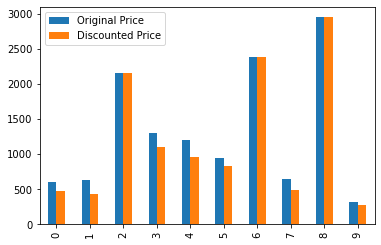

In [68]:
cosmetic[['Original Price','Discounted Price']][:10].plot(kind='bar');

+ As we can see Offer price is either less or equal to Original price.

Let's plot histogram for Original Price using seaborn library.
It will give us idea of highest range.

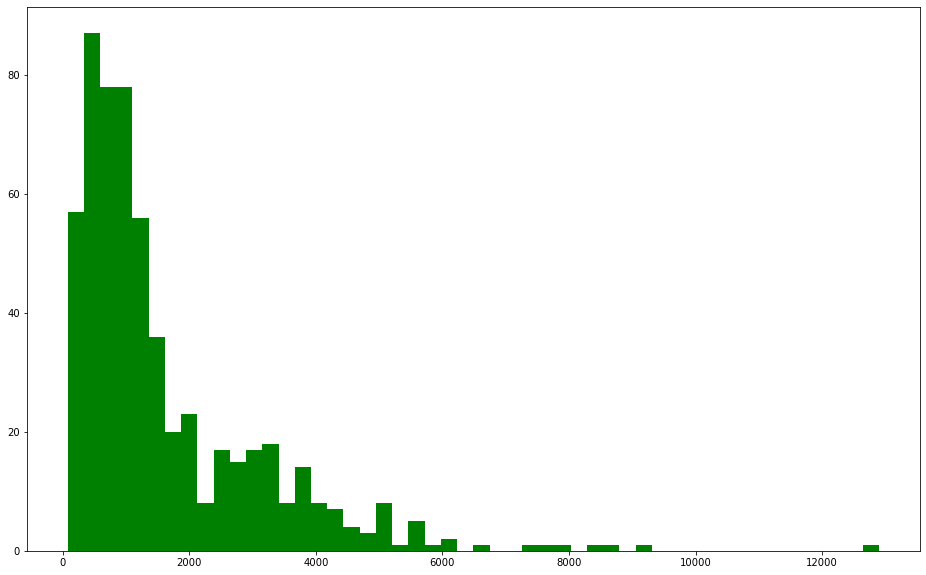

In [69]:
plt.figure(figsize = (16,10))
plt.hist(data = cosmetic, x = 'Original Price',bins=50, color = 'Green');
plt.show()

+ As we can see most comman range for price is 0 - 4000

+ So, let's plot for common price range.

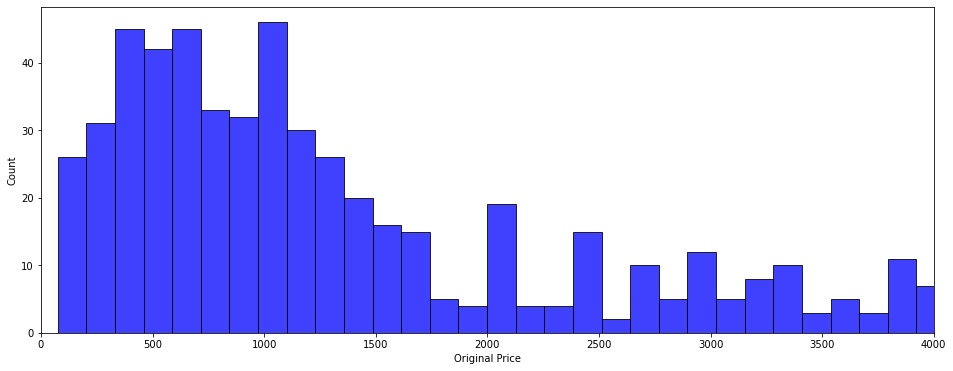

In [70]:
plt.figure(figsize = (16,6))
g = sns.histplot(data = cosmetic, x = 'Original Price', bins = 100,color = 'Blue')
g.set(xlim = (0,4000))
g
plt.show()

+ Now, Let's check count of Gift categories.

+ Here we will use countplot.

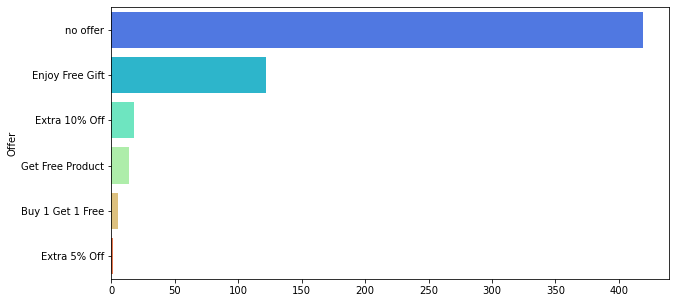

In [71]:
Offer = cosmetic.value_counts('Offer').sort_values(ascending=False)
plt.figure(figsize = (10,5))
sns.barplot(y=Offer.index,x = Offer,palette='rainbow');

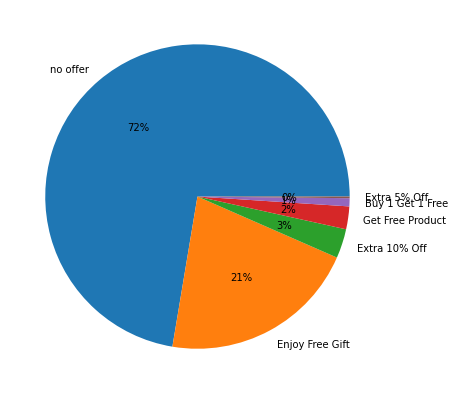

In [72]:
g = cosmetic['Offer'].value_counts().head(10)
plt.figure(figsize = (7,7))
plt.pie(x = g, data = cosmetic,labels = g.index,autopct='%.0f%%')
plt.show()

+ As we see, There are 6 different gifts.
+ 'No Gift' with 400+ count.
+ 'Enjoy Free gift' with nearer to 120 count.
+ 'Buy 1 Get 1 Free' with least count.

Now, Let's plot and check different discount count.

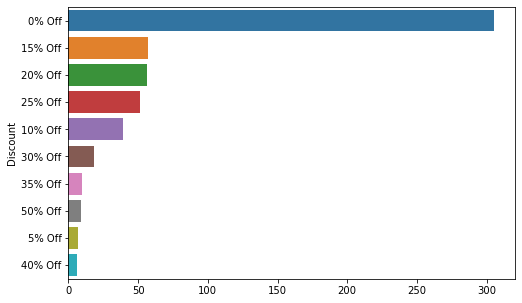

In [73]:
a = cosmetic.value_counts('Discount').sort_values(ascending=False)
plt.figure(figsize = (8,5))
sns.barplot(y=a.index[:10],x=a[:10])
plt.show()

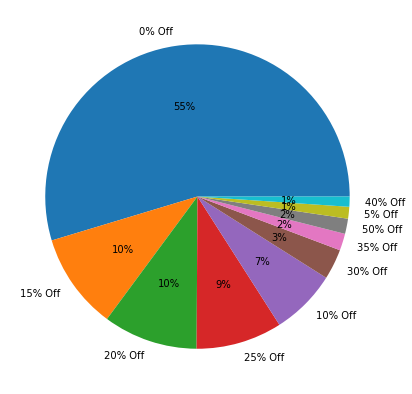

In [74]:
discount = cosmetic['Discount'].value_counts().head(10)
plt.figure(figsize = (7,7))
plt.pie(x = discount, data = cosmetic,labels = discount.index,autopct='%.0f%%')
plt.show()

+ As we see, There are 10 different discounts.
+ '0% Off' with nearer to below 300 count.
+ '40% Off' with least count.

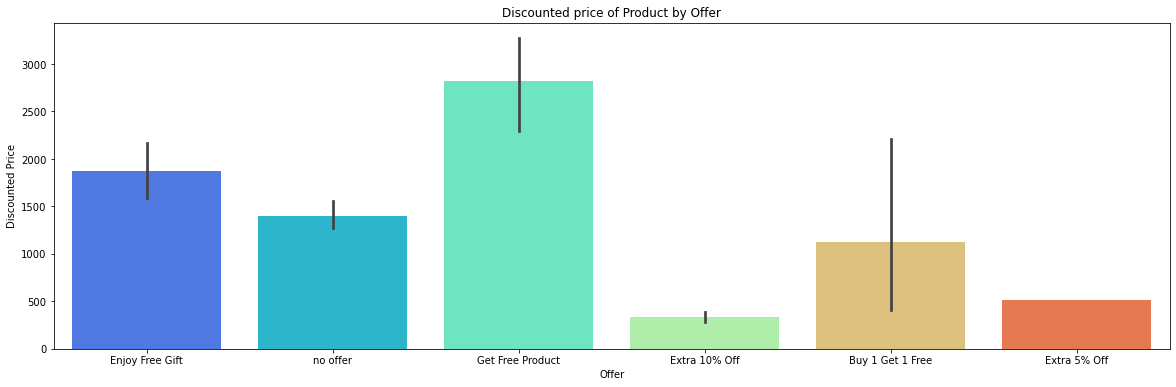

In [75]:
plt.figure(figsize=(20,6))
sns.barplot(x='Offer',y='Discounted Price',data= cosmetic,palette='rainbow')
plt.title('Discounted price of Product by Offer')
plt.show()

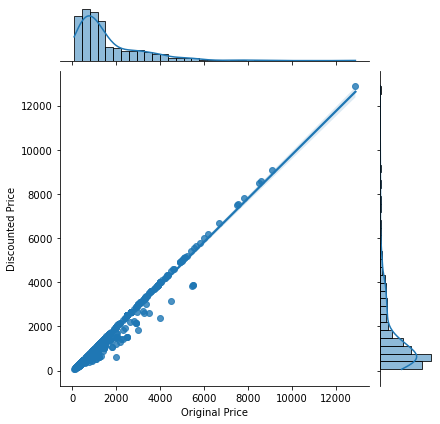

In [76]:
sns.jointplot(x='Original Price', y='Discounted Price', data=cosmetic, kind='reg');

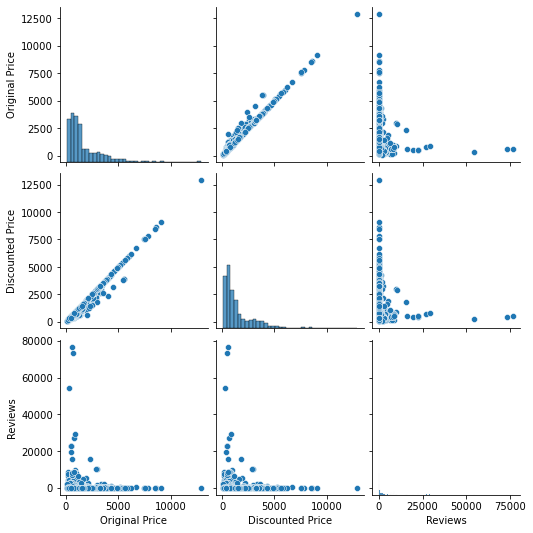

In [77]:
sns.pairplot(cosmetic);

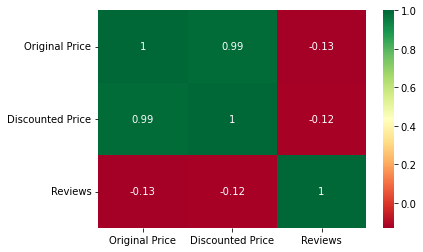

In [78]:
sns.heatmap(cosmetic.corr(),annot=True,cmap='RdYlGn');

In [79]:
cosmetic['Brand Name'].value_counts()

Nykaa         48
Paese         25
Maybelline    23
Insight       19
Dermacol      18
              ..
Wet            1
Anastasia      1
Ruby's         1
Viseart        1
BOLLYGLOW      1
Name: Brand Name, Length: 112, dtype: int64

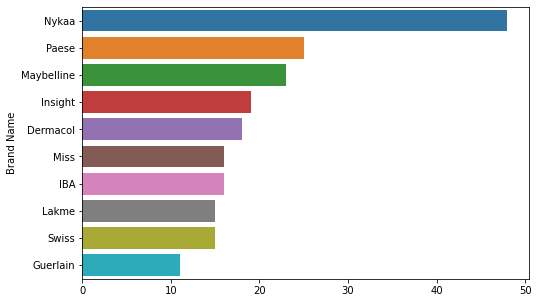

In [80]:
a = cosmetic.value_counts('Brand Name').sort_values(ascending=False)
plt.figure(figsize = (8,5))
sns.barplot(y=a.index[:10],x=a[:10])
plt.show()

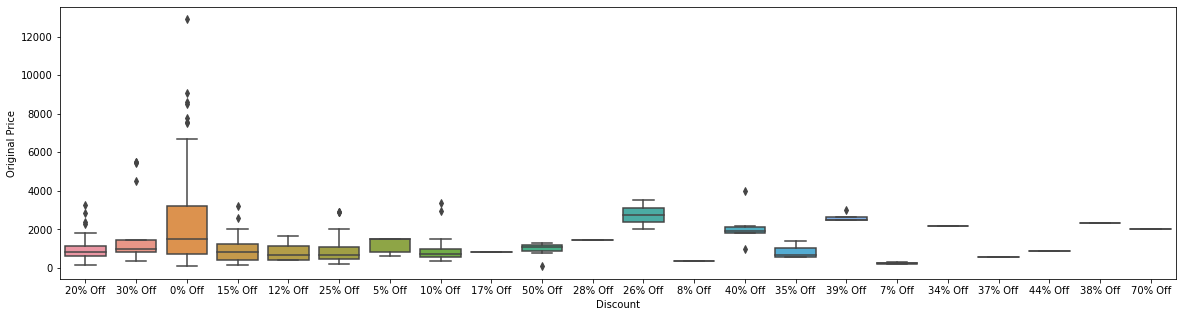

In [81]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Discount',y='Original Price',data=cosmetic)
plt.show()

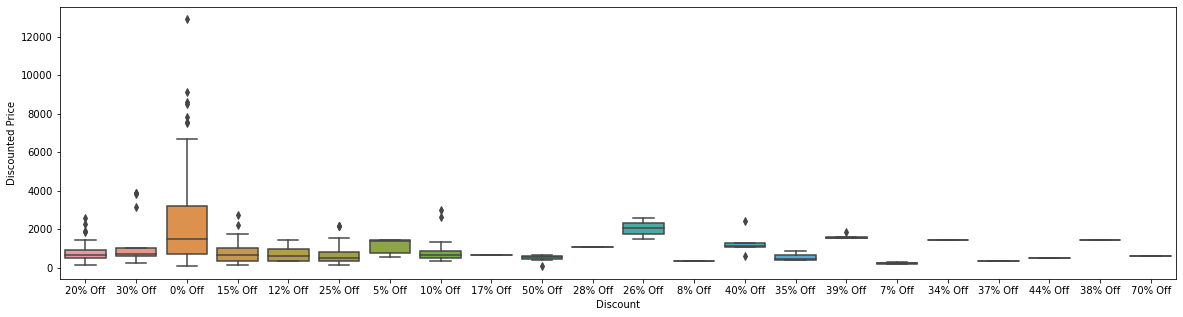

In [82]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Discount',y='Discounted Price',data=cosmetic)
plt.show()